# Pesticide Use in Agriculture Analysis

## Preparation of the data

About Dataset

This dataset includes annual county-level pesticide use estimates for 423 pesticides (active ingredients) applied to agricultural crops grown in the contiguous United States. Two different methods were used to estimate a range of pesticide use for all states except California. Both low and high estimate methods incorporated proprietary surveyed rates for United States Department of Agriculture Crop Reporting Districts, but the estimates differed in how they treated situations when a district was surveyed and pesticide use was not reported. 

**Low estimates** assumed zero use in the district for that pesticide; however, **high estimates** treated the unreported use of pesticides as missing data and estimated the pesticide usage from neighboring locations within the same region.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warning
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# unzip the file
import zipfile
zip_file_path = 'archive.zip'
output_directory = './source'

with zipfile.ZipFile(zip_file_path, mode='r') as zip_ref:
    zip_ref.extractall(output_directory)

In [2]:
# Load the file
raw_data_2014 = pd.read_csv("./source/2014.csv")
raw_data_2015 = pd.read_csv("./source/2015.csv")
raw_state = pd.read_csv("./source/dictionary.csv")


In [3]:
# Merge the data
state_2014_df = pd.merge(raw_data_2014, raw_state, how='left', on= ['STATE_CODE', 'COUNTY_CODE'])
state_2015_df = pd.merge(raw_data_2015, raw_state, how='left', on= ['STATE_CODE', 'COUNTY_CODE'])
state_2014_df


COMPOUND  YEAR  STATE_CODE  COUNTY_CODE  LOW_ESTIMATE  HIGH_ESTIMATE  \
0          2,4-D  2014           1            1        1698.6         1885.5   
1          2,4-D  2014           1            3        7513.6         8472.4   
2          2,4-D  2014           1            5        2613.6         2889.4   
3          2,4-D  2014           1            7        1259.2         1277.7   
4          2,4-D  2014           1            9        7590.5         7756.1   
...          ...   ...         ...          ...           ...            ...   
392428  Zoxamide  2014          55          135          19.7           19.7   
392429  Zoxamide  2014          55          137         270.5          270.5   
392430  Zoxamide  2014          55          139           0.0            0.0   
392431  Zoxamide  2014          55          141           5.5            5.5   
392432  Zoxamide  2014          56           23           0.1            0.1   

                  COUNTY STATE  
0         Autauga County    AL  
1         Baldwin County    AL  
2         Barbour County    AL  
3            Bibb County    AL  
4          Blount County    AL  
...                  ...   ...  
392428    Waupaca County    WI  
392429   Waushara County    WI  
392430  Winnebago County    WI  
392431       Wood County    WI  
392432    Lincoln County    WY  

[392433 rows x 8 columns]

In [18]:
state_2015_df

COMPOUND  YEAR  STATE_CODE  COUNTY_CODE  LOW_ESTIMATE  \
0       1-Methyl Cyclopropene  2015          41            1           NaN   
1       1-Methyl Cyclopropene  2015          41           21           NaN   
2       1-Methyl Cyclopropene  2015          41           27           NaN   
3       1-Methyl Cyclopropene  2015          41           49           NaN   
4       1-Methyl Cyclopropene  2015          41           55           NaN   
...                       ...   ...         ...          ...           ...   
369758               Zoxamide  2015          55          135          17.3   
369759               Zoxamide  2015          55          137         168.5   
369760               Zoxamide  2015          55          139           0.0   
369761               Zoxamide  2015          55          141           2.4   
369762               Zoxamide  2015          56           23           0.3   

        HIGH_ESTIMATE             COUNTY STATE  
0                 0.0       Baker County    OR  
1                 0.1     Gilliam County    OR  
2                 1.7  Hood River County    OR  
3                 0.1      Morrow County    OR  
4                 0.0     Sherman County    OR  
...               ...                ...   ...  
369758           17.3     Waupaca County    WI  
369759          168.5    Waushara County    WI  
369760            0.2   Winnebago County    WI  
369761            2.4        Wood County    WI  
369762            0.3     Lincoln County    WY  

[369763 rows x 8 columns]

### Observation & Analysis

We can observe that the LOW_ESTIMATE values are missing in both annual datasets. As mentioned in the introduction to the data background, this is due to some states and counties not reporting pesticide usage. Consequently, the corresponding HIGH_ESTIMATE values must be estimated based on pesticide usage in nearby areas.

Since the missing values of LOW_ESTIMATE have specific physical significance and a large proportion of samples are affected, we do not intend to perform conventional data cleaning operations such as sample removal. Instead, we will directly replace them with a value of -1 to represent their meaning (we do not use 0 because it already signifies "reported and no pesticide usage").

In [5]:
# Fill the null value with -1.
state_2014_df["LOW_ESTIMATE"] = state_2014_df["LOW_ESTIMATE"].fillna(-1)
state_2015_df["LOW_ESTIMATE"] = state_2015_df["LOW_ESTIMATE"].fillna(-1)

# Check the missing value
print(state_2014_df.isna().sum())
print(state_2015_df.isna().sum())

COMPOUND         0
YEAR             0
STATE_CODE       0
COUNTY_CODE      0
LOW_ESTIMATE     0
HIGH_ESTIMATE    0
COUNTY           0
STATE            0
dtype: int64
COMPOUND         0
YEAR             0
STATE_CODE       0
COUNTY_CODE      0
LOW_ESTIMATE     0
HIGH_ESTIMATE    0
COUNTY           0
STATE            0
dtype: int64


## Analysis & Visualization

### Distribution Analysis 

Firstly, we will observe the distribution of pesticide usage across the different year and regions. 

In [31]:
# Configure the seaborn parameter
sns.set_style("white")

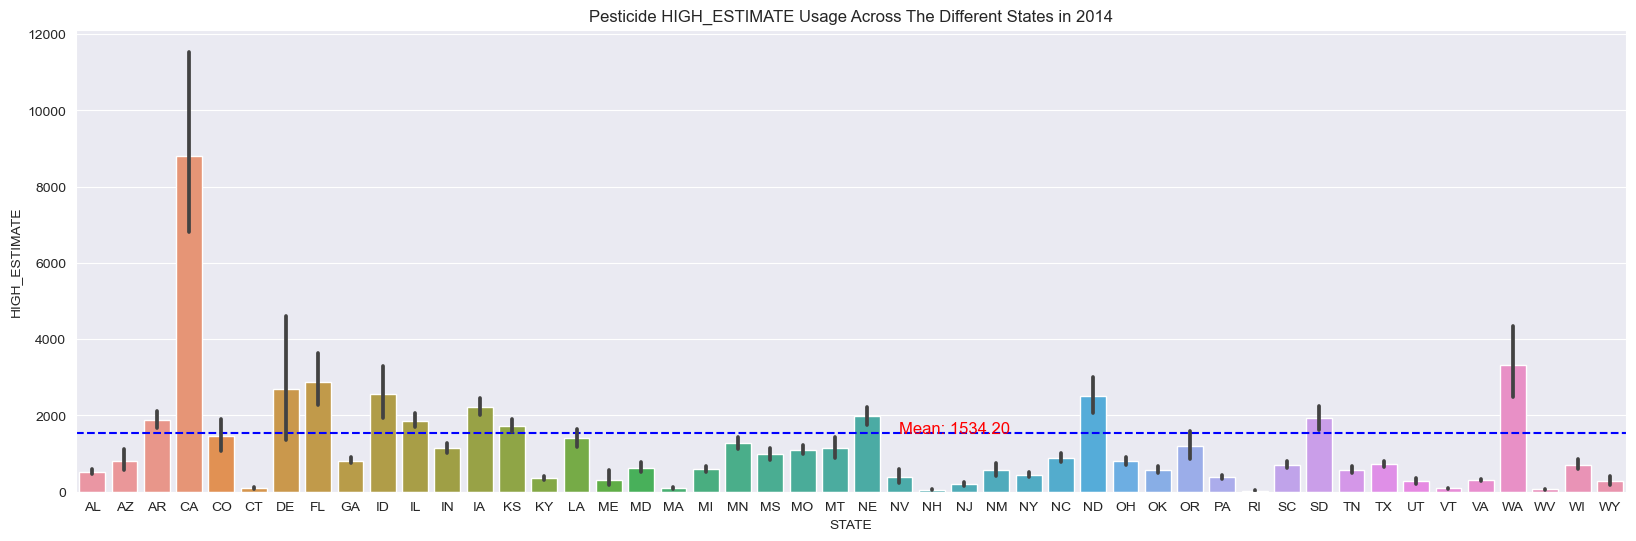

In [32]:
# Configure the plot size
plt.figure(figsize=(20, 6))

# Calculate the mean value of HIGH_ESTIMATE 
mean_high_east_2014 = state_2014_df["LOW_ESTIMATE"].mean()
plt.axhline(y=mean_high_east_2014, color = "blue", linestyle = "--")
plt.annotate(f'Mean: {mean_high_east_2014:.2f}', xy=(25, mean_high_east_2014 + 10), color='r', fontsize=12)

# bar chart： Distribution of pesticide usage 
sns.barplot(data=state_2014_df, x="STATE", y = "HIGH_ESTIMATE")
plt.xticks()
plt.title("Pesticide HIGH_ESTIMATE Usage Across The Different States in 2014")
plt.savefig("./outputs/Pesticide HIGH_ESTIMATE Usage Across The Different States in 2014.png")
plt.show()

The chart shows the high estimates of pesticide usage in various states for 2014.

- California is significantly higher than other states, with usage close to 12,000, making it the highest.
- Most states have pesticide usage below the average level (approximately 1534.20), with only a few significantly above the average.

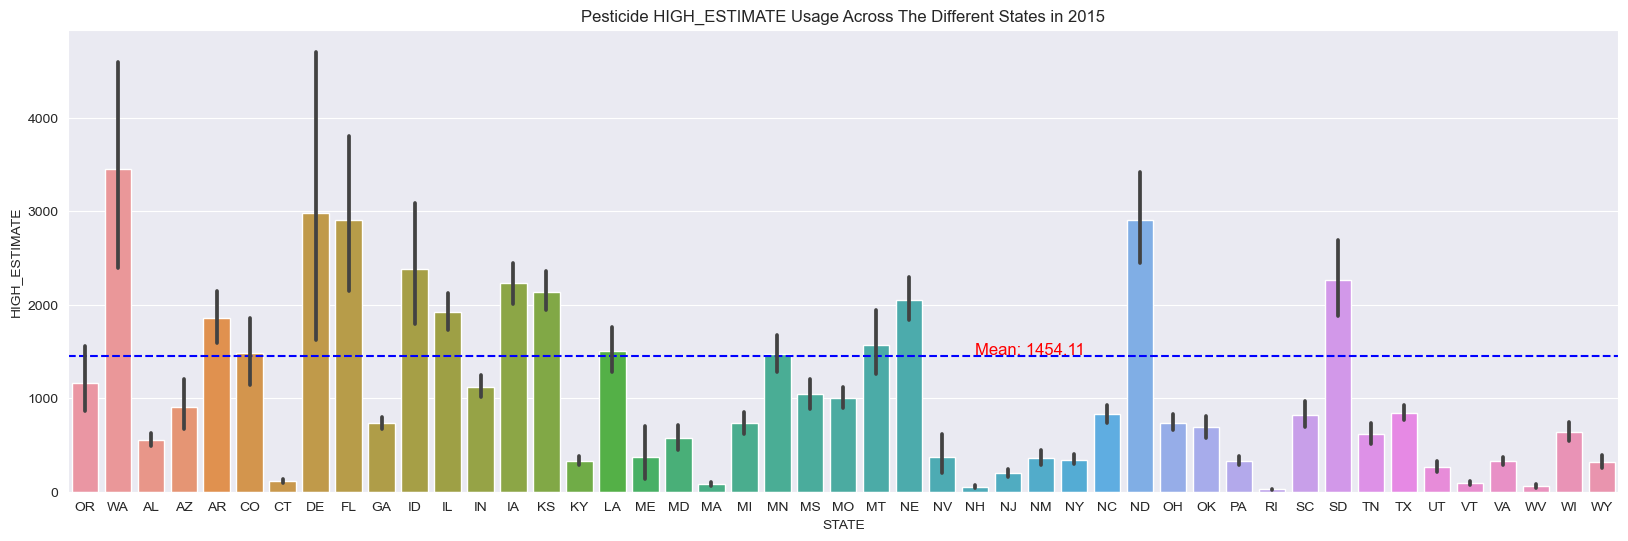

In [33]:
# Configure the plot size
plt.figure(figsize=(20, 6))

# Calculate the mean value of HIGH_ESTIMATE 
mean_high_east_2015 = state_2015_df["LOW_ESTIMATE"].mean()
plt.axhline(y=mean_high_east_2015, color = "blue", linestyle = "--")
plt.annotate(f'Mean: {mean_high_east_2015:.2f}', xy=(27, mean_high_east_2015 + 10), color='r', fontsize=12)

# bar chart： Distribution of pesticide usage 
sns.barplot(data=state_2015_df, x="STATE", y = "HIGH_ESTIMATE")
plt.xticks()
plt.title("Pesticide HIGH_ESTIMATE Usage Across The Different States in 2015")
plt.savefig("./outputs/Pesticide HIGH_ESTIMATE Usage Across The Different States in 2015.png")
plt.show()

The chart shows the estimated high values of pesticide usage in various states for 2015.

- Washington and North Dakota are significantly higher than other states, with usage close to 3500 and 4000 respectively, making them the top two states.

- Most states have pesticide usage below average, with only a few significantly above the average.

- California had the highest usage in 2014, but data for 2015 is missing.

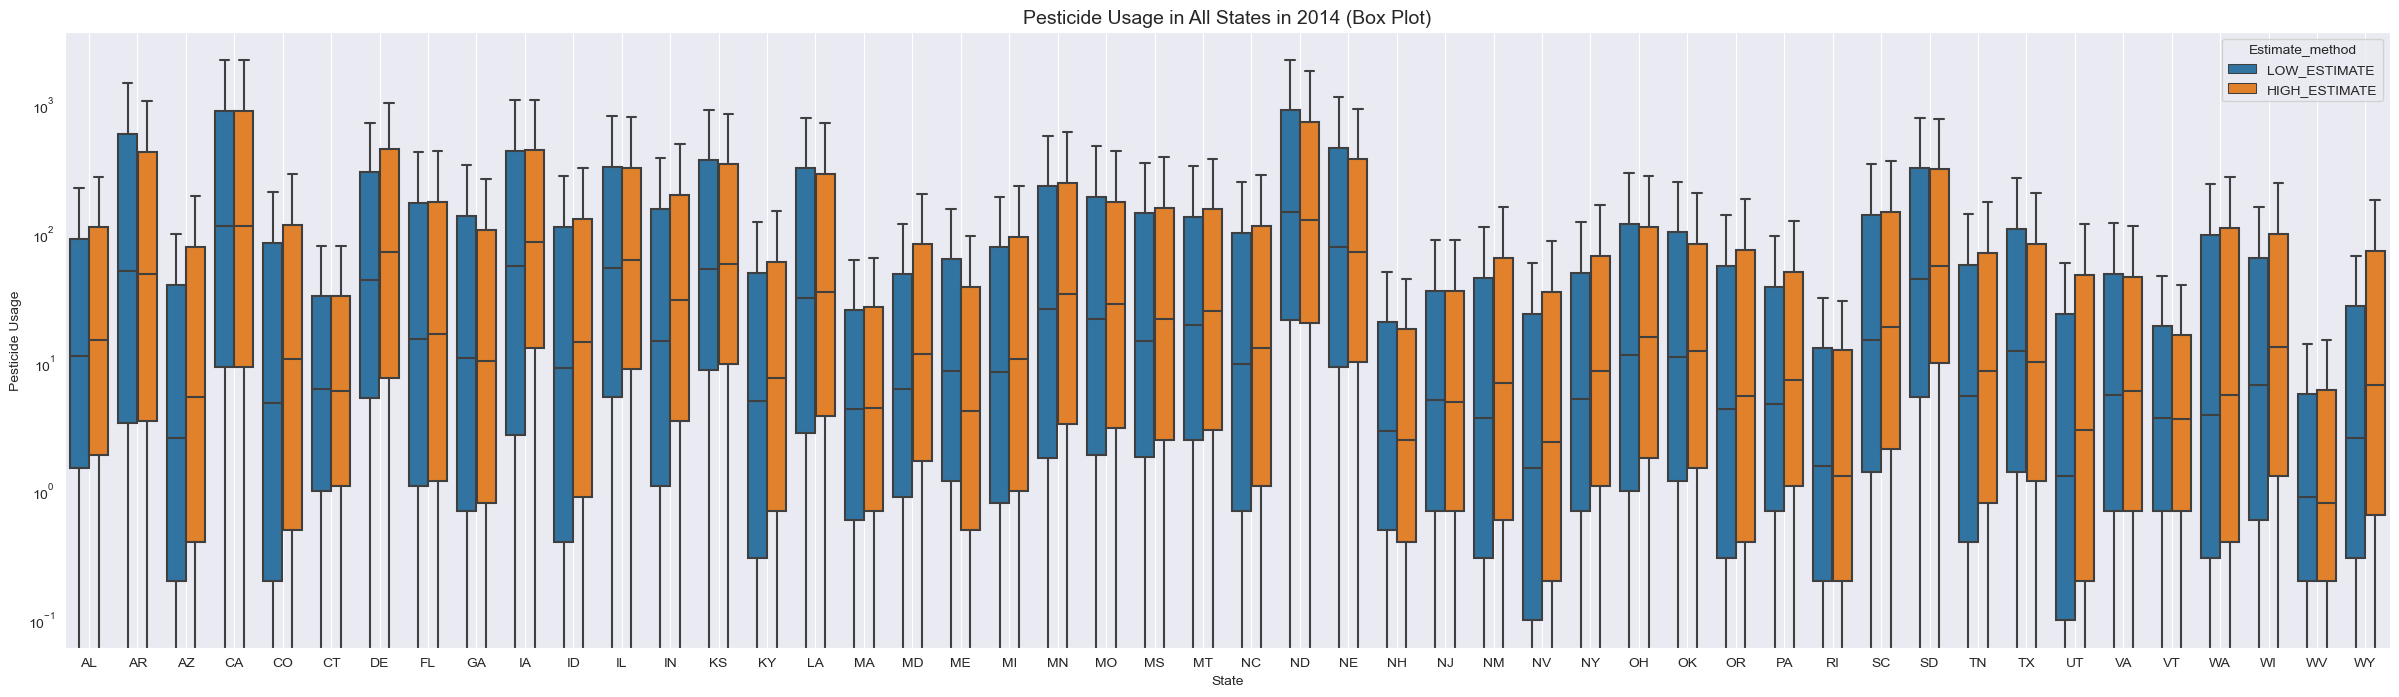

In [34]:
# Build a box plot:Pesticide Usage in All States in 2014
# Create a copy of the dataframe containing LOW_ESTIMATE not equal to -1
temp_l = state_2014_df[state_2014_df.LOW_ESTIMATE != -1].copy()
temp_l.loc[:, 'Estimate_method'] = "LOW_ESTIMATE"
temp_l.loc[:, 'estimate'] = temp_l.LOW_ESTIMATE

# Create a copy of the dataframe for HIGH_ESTIMATE
temp_h = state_2014_df.copy()
temp_h.loc[:, 'Estimate_method'] = "HIGH_ESTIMATE"
temp_h.loc[:, 'estimate'] = temp_h.HIGH_ESTIMATE

# Concatenate the two dataframes and sort by STATE
temp = pd.concat([temp_l, temp_h], axis=0).sort_values('STATE')

# Plot the boxplot
plt.figure(figsize=(30, 8))
sns.boxplot(x="STATE", y="estimate", hue='Estimate_method', data=temp, showfliers=False)
plt.yscale('log')  # Use logarithmic scale for y-axis
plt.xlabel("State")
plt.ylabel("Pesticide Usage")
plt.title("Pesticide Usage in All States in 2014 (Box Plot)", fontsize=14)
plt.grid()

# Show the plot
plt.savefig("./outputs/Pesticide Usage in All States in 2014(Box Plot).png")
plt.show()

The chart shows the low estimate (LOW_ESTIMATE) and high estimate (HIGH_ESTIMATE) of pesticide usage in each state for 2014. The box plot displays the distribution of pesticide usage in each state, including the median, upper and lower quartiles, and outliers.

- States like California (CA), North Dakota (ND), and Washington (WA) have higher pesticide usage with greater dispersion, indicating large-scale agricultural production and more extensive use of pesticides.
- States like Connecticut (CT) and New Hampshire (NH) have lower and more concentrated pesticide usage, suggesting smaller-scale agricultural production with less use of pesticides.

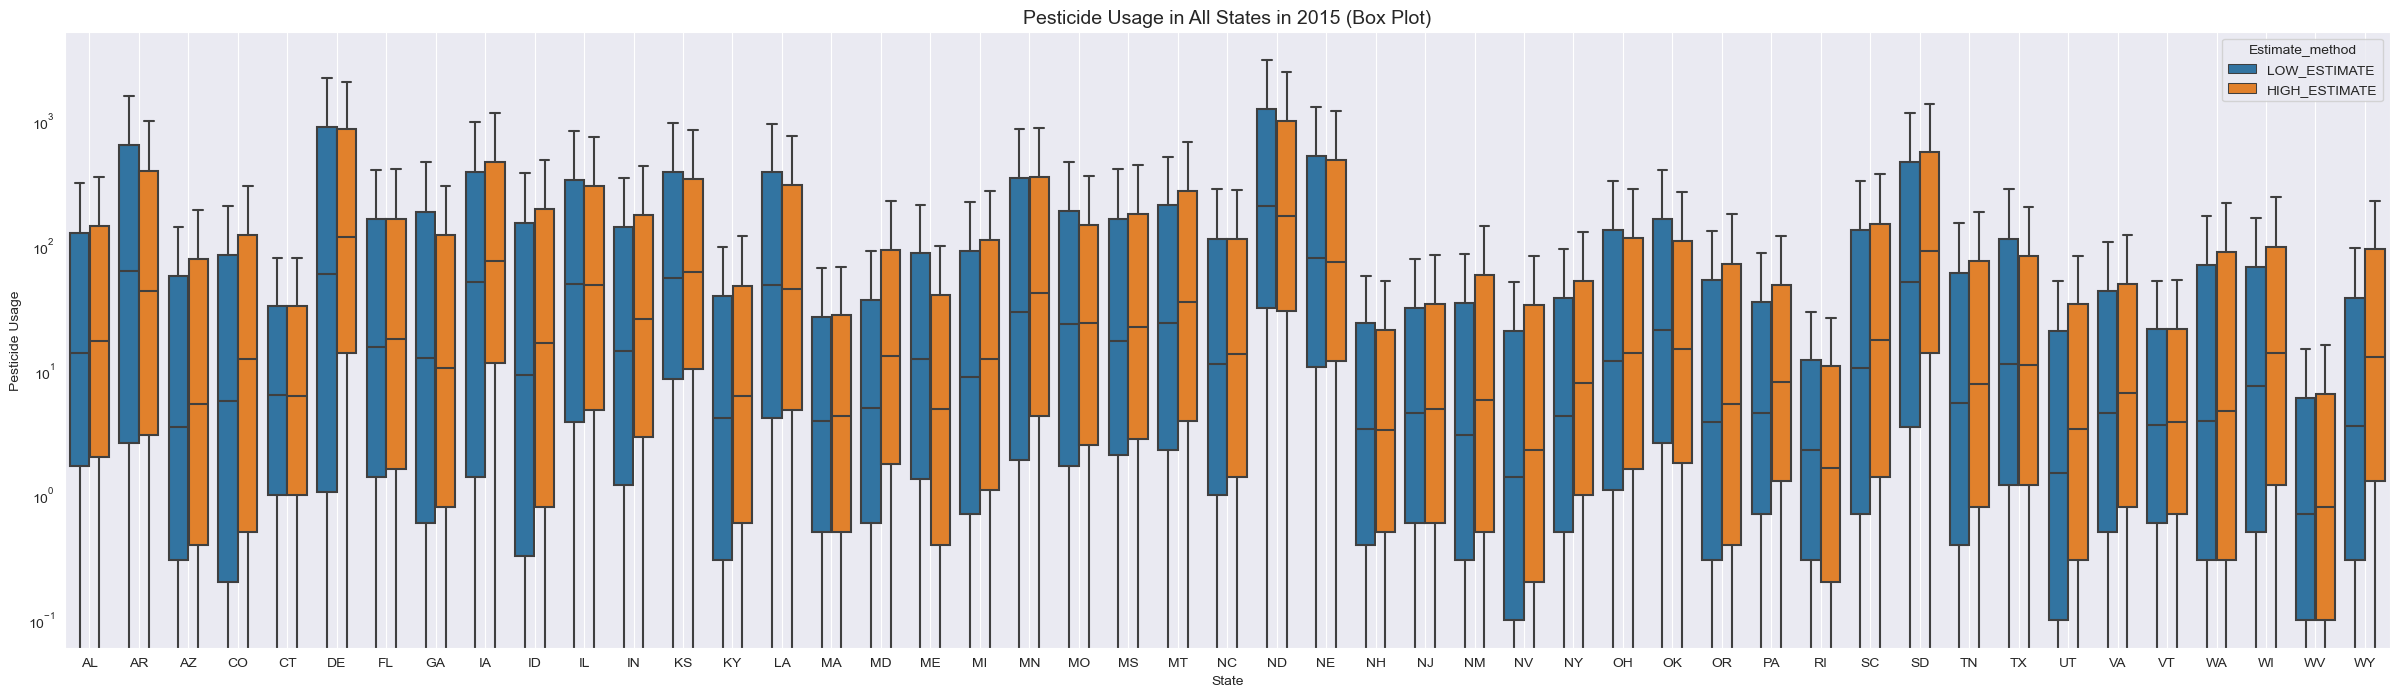

In [35]:
# Build a box plot:Pesticide Usage in All States in 2015
# Create a copy of the dataframe containing LOW_ESTIMATE not equal to -1
temp_l = state_2015_df[state_2015_df.LOW_ESTIMATE != -1].copy()
temp_l.loc[:, 'Estimate_method'] = "LOW_ESTIMATE"
temp_l.loc[:, 'estimate'] = temp_l.LOW_ESTIMATE

# Create a copy of the dataframe for HIGH_ESTIMATE
temp_h = state_2015_df.copy()
temp_h.loc[:, 'Estimate_method'] = "HIGH_ESTIMATE"
temp_h.loc[:, 'estimate'] = temp_h.HIGH_ESTIMATE

# Concatenate the two dataframes and sort by STATE
temp = pd.concat([temp_l, temp_h], axis=0).sort_values('STATE')

# Plot the boxplot
plt.figure(figsize=(30, 8))
sns.boxplot(x="STATE", y="estimate", hue='Estimate_method', data=temp, showfliers=False)
plt.yscale('log')  # Use logarithmic scale for y-axis
plt.xlabel("State")
plt.ylabel("Pesticide Usage")
plt.title("Pesticide Usage in All States in 2015 (Box Plot)", fontsize=14)
plt.grid()

# Show the plot
plt.savefig("./outputs/Pesticide Usage in All States in 2015(Box Plot).png")
plt.show()

The chart shows the low estimate (LOW_ESTIMATE) and high estimate (HIGH_ESTIMATE) of pesticide usage in each state for 2015. The box plot displays the distribution of pesticide usage in each state, including the median, upper and lower quartiles, and outliers.

- States like Arkansas (AR), Iowa (IA), and North Dakota (ND) have higher pesticide usage with greater dispersion, indicating large-scale agricultural production and more extensive use of pesticides.
- States like Connecticut (CT) and New Hampshire (NH) have lower and more concentrated pesticide usage, indicating smaller-scale agricultural production with less use of pesticides.

### Analysis of average pesticide usage and differences across each states

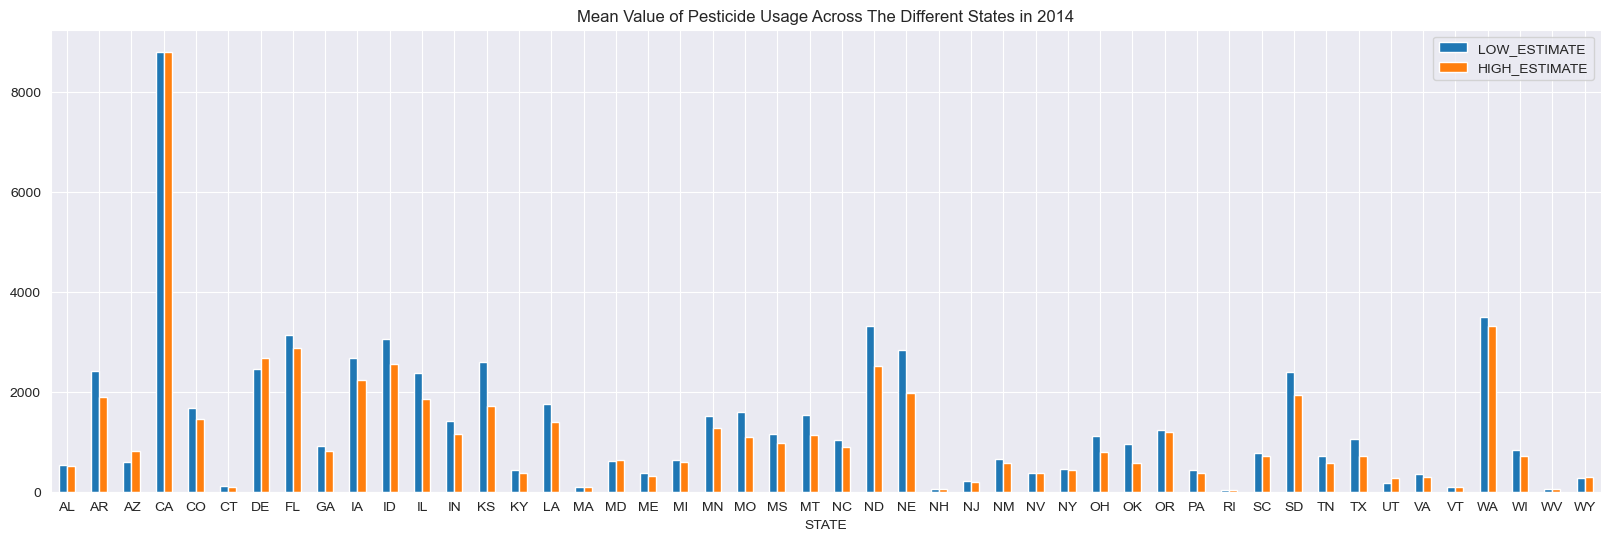

In [36]:
# Compare the low estimate value and high estimate value in 2014
state_2014_mean = (state_2014_df[['STATE', 'LOW_ESTIMATE', 'HIGH_ESTIMATE']]
                .groupby('STATE')
                .mean()
                )
# Build Bar Chart 
state_2014_mean.plot(kind = 'bar', stacked=False, figsize=(20, 6))
plt.xticks(rotation=0)
plt.title("Mean Value of Pesticide Usage Across The Different States in 2014")
plt.savefig("./outputs/Mean Value of Pesticide Usage Across The Different States in 2014.png")
plt.show()

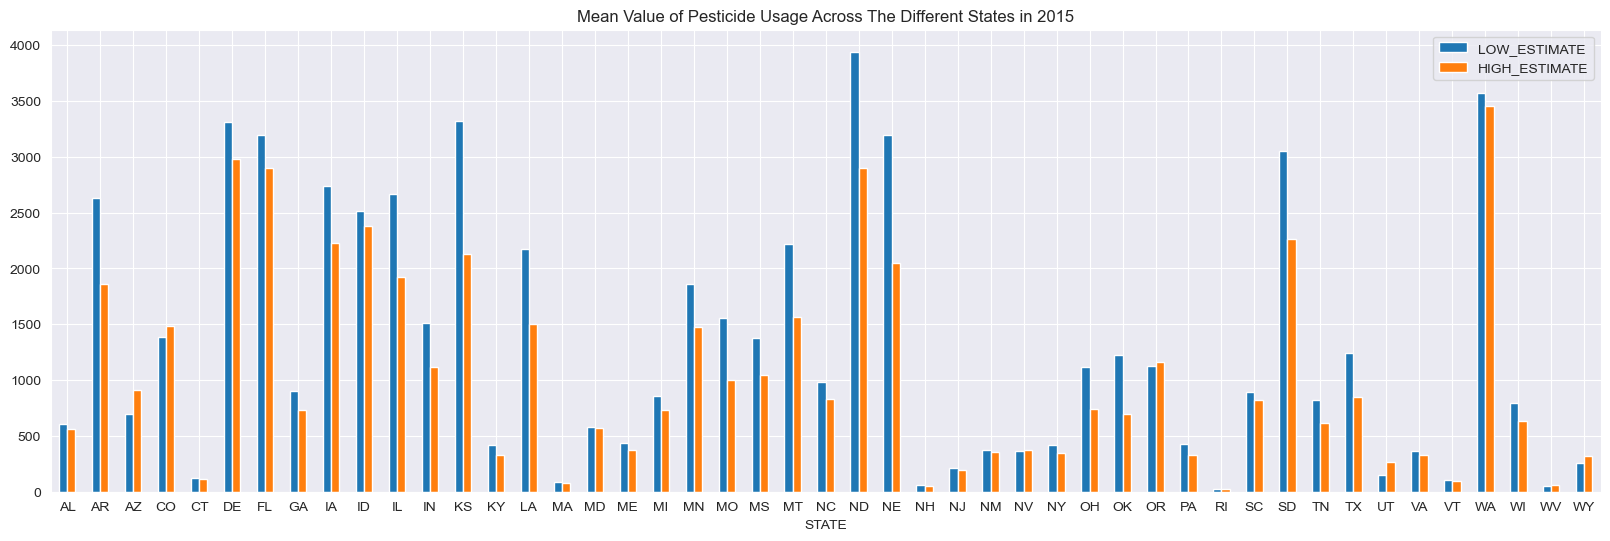

In [37]:
# Compare the low estimate value and high estimate value in 2015
state_2015_mean = (state_2015_df[['STATE', 'LOW_ESTIMATE', 'HIGH_ESTIMATE']]
                   .groupby('STATE')
                   .mean()
                   )
# Build Bar Chart 
state_2015_mean.plot(kind = 'bar', stacked=False, figsize=(20, 6))
plt.xticks(rotation=0)
plt.title("Mean Value of Pesticide Usage Across The Different States in 2015")
plt.savefig("./outputs/Mean Value of Pesticide Usage Across The Different States in 2015.png")
plt.show()

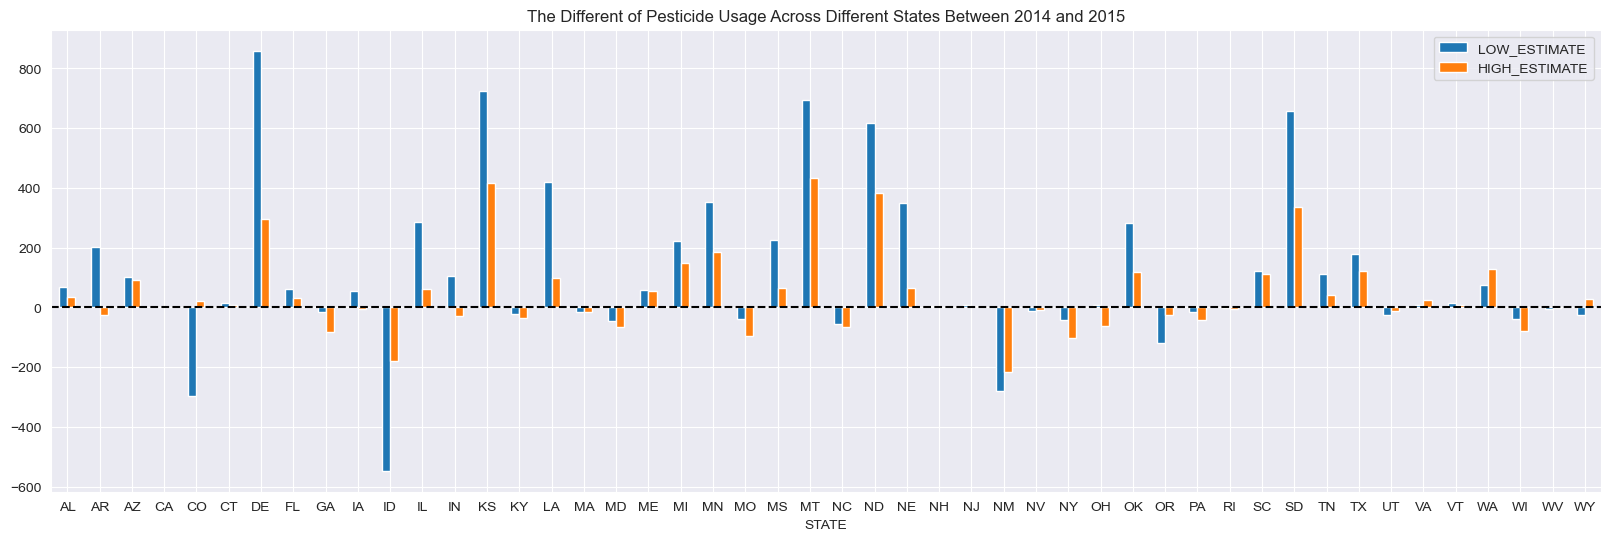

In [38]:
# Compare the difference between 2014 and 2015
diff_df = (state_2015_mean - state_2014_mean).fillna(0)

# Build the bar chart
diff_df.plot(kind = 'bar', stacked=False, figsize=(20, 6))
plt.xticks(rotation=0)
# configure the zero mark line
plt.axhline(y=0, color = "black", linestyle = "--")
plt.title("The Different of Pesticide Usage Across Different States Between 2014 and 2015")
plt.savefig("./outputs/The Different of Pesticide Usage Across Different States Between 2014 and 2015.png")
plt.show()

### Analysis：

These charts show the changes (increase or decrease) in pesticide usage across various states from 2014 to 2015. High values and low values are represented by orange and blue, respectively.

- Pesticide usage significantly increased in Washington (WA) and North Dakota (ND).
- Pesticide usage decreased in Iowa (IA) and Texas (TX).
- Data for California in 2015 is missing, making comparison impossible.

## COMPOUND Analysis

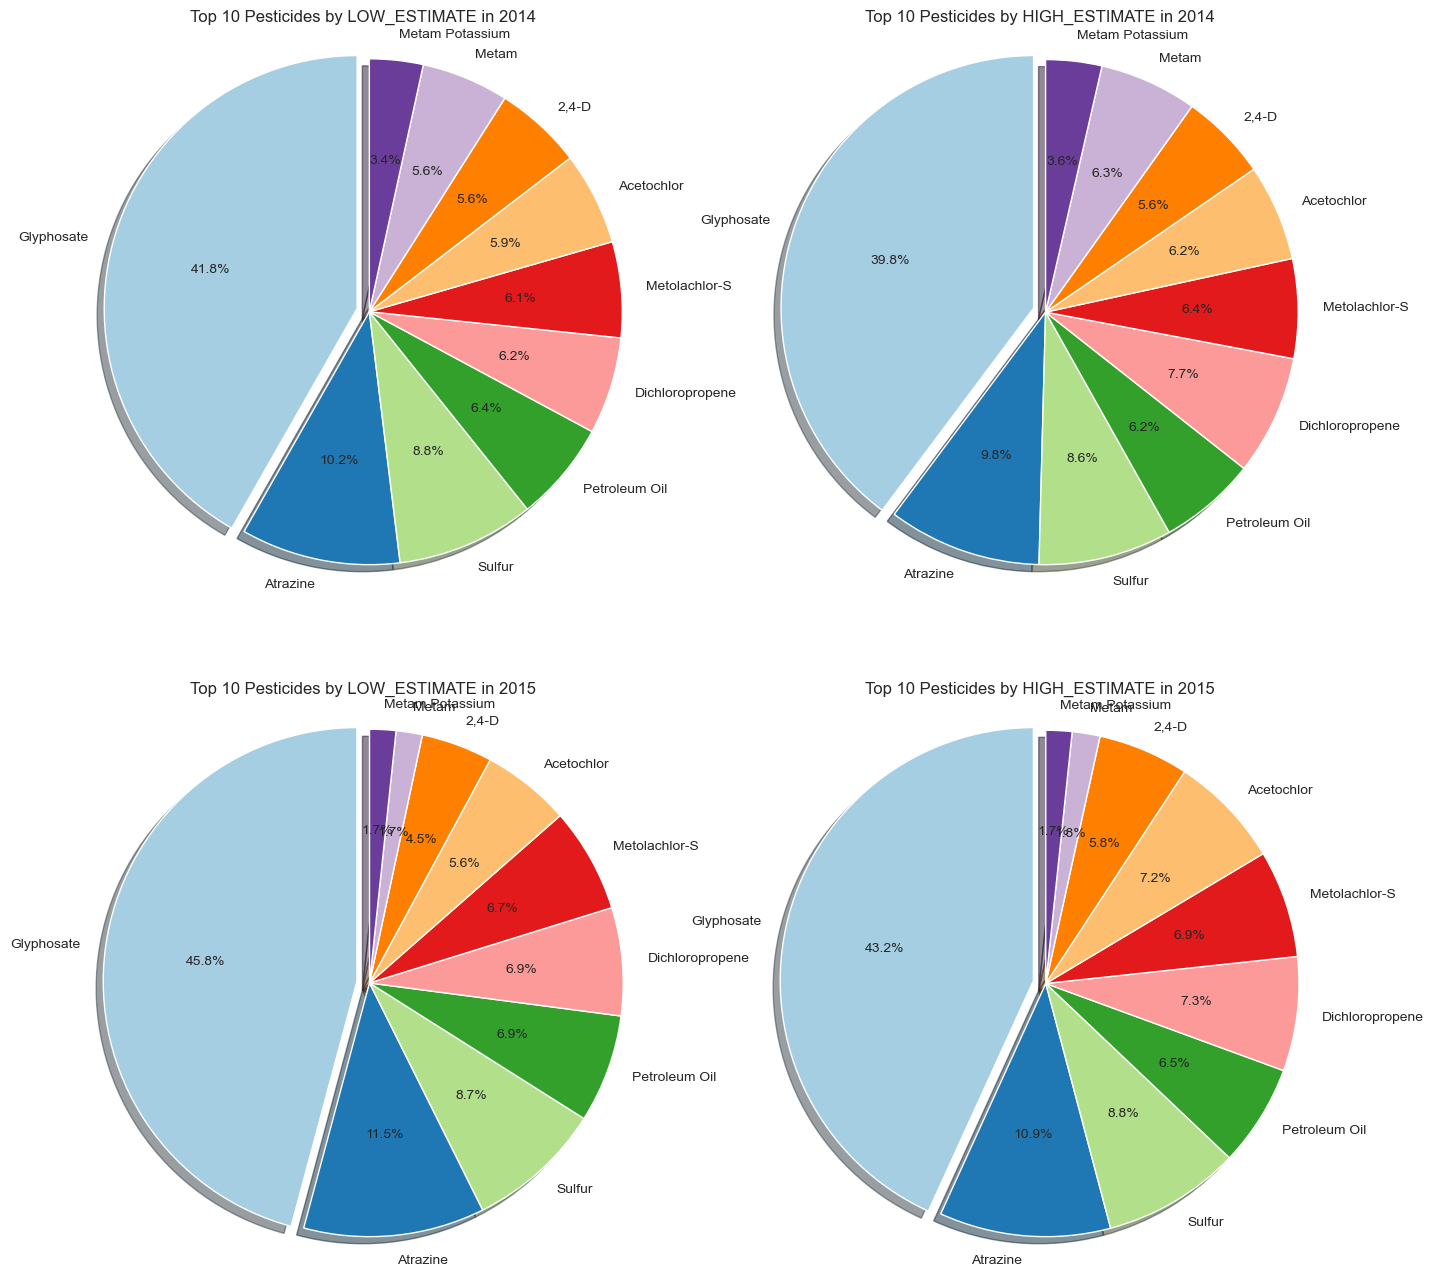

In [40]:
# state_2014_df["COMPOUND"].unique()
selected_num = 10
compound_2014 = (state_2014_df[['COMPOUND', 'LOW_ESTIMATE', 'HIGH_ESTIMATE']]
                 .groupby('COMPOUND').sum()
                 .sort_values(by='LOW_ESTIMATE', ascending=False)
                 .reset_index()
                 .head(selected_num)    # Only selecte top 10 pesticide
                 )

compound_2015 = (state_2015_df[['COMPOUND', 'LOW_ESTIMATE', 'HIGH_ESTIMATE']]
                 .groupby('COMPOUND').sum()
                 .sort_values(by='LOW_ESTIMATE', ascending=False)
                 .reset_index()
                 .head(selected_num)    # Only selecte top 10 pesticide
                 )

# Pie chart configure
startangle = 90
explode = (0.05,) + (0,) * (selected_num -1)
color = sns.color_palette("Paired", n_colors=selected_num)

# build pie chart
plt.figure(figsize=(16, 16))

# 2014 LOW_ESTIMATE
plt.subplot(2, 2, 1)
plt.pie(compound_2014['LOW_ESTIMATE'], explode=explode, labels=compound_2014['COMPOUND'], colors=color, autopct='%1.1f%%',
        shadow=True, startangle=startangle)

plt.title('Top 10 Pesticides by LOW_ESTIMATE in 2014')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 2014 HIGH_ESTIMATE
plt.subplot(2, 2, 2)
plt.pie(compound_2014['HIGH_ESTIMATE'], explode=explode, labels=compound_2014['COMPOUND'], colors=color, autopct='%1.1f%%',
        shadow=True, startangle=startangle)

plt.title('Top 10 Pesticides by HIGH_ESTIMATE in 2014')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 2015 LOW_ESTIMATE
plt.subplot(2, 2, 3)
plt.pie(compound_2015['LOW_ESTIMATE'], explode=explode, labels=compound_2014['COMPOUND'], colors=color, autopct='%1.1f%%',
        shadow=True, startangle=startangle)

plt.title('Top 10 Pesticides by LOW_ESTIMATE in 2015')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 2015 HIGH_ESTIMATE
plt.subplot(2, 2, 4)
plt.pie(compound_2015['HIGH_ESTIMATE'], explode=explode, labels=compound_2014['COMPOUND'], colors=color, autopct='%1.1f%%',
        shadow=True, startangle=startangle)

plt.title('Top 10 Pesticides by HIGH_ESTIMATE in 2015')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("./outputs/Top 10 Pesticides in 2014-2015.png")
plt.show()

This chart provides data from 2014 and 2015, showing the proportional distribution of the top ten most commonly used pesticides in the United States based on low and high estimates. By analyzing these pie charts, we can understand which pesticides were most prevalent during these two years and how their usage trends changed.

- The dominance of **Glyphosate** remained stable over these two years, indicating its widespread use in U.S. agriculture.
- The usage of **Atrazine** decreased, possibly due to changes in environmental regulations or market preferences.
- Minor fluctuations (such as with **Sulfur**, **Petroleum Oil**, **Dichloropropene**) may reflect annual variations in specific crop planting areas or seasonal differences in agricultural pest pressure.

## Geographical Analysis

In [16]:
# Dependence
import geopandas as gpd

# Load the data
us_geodf = gpd.GeoDataFrame.from_file("./source/cb_2014_us_county_500k.shp", encoding='utf-8')
us_geodf["COUNTY_CODE"] = us_geodf.COUNTYFP.map(lambda x: int(x))
us_geodf["STATE_CODE"] = us_geodf.STATEFP.map(lambda x: int(x))

# Transfer the data format
data2014_gpd = gpd.GeoDataFrame(state_2014_df)
data2014_gpd_merge = gpd.GeoDataFrame.merge(us_geodf, data2014_gpd, on=['COUNTY_CODE', 'STATE_CODE'], how='left')
data2015_gpd = gpd.GeoDataFrame(state_2015_df)
data2015_gpd_merge = gpd.GeoDataFrame.merge(us_geodf, data2015_gpd, on=['COUNTY_CODE', 'STATE_CODE'], how='left')

# check
# data2014_gpd_merge.head()
data2015_gpd_merge.head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME LSAD       ALAND  \
0      01      001  00161526  0500000US01001  01001  Autauga   06  1539584444   
1      01      001  00161526  0500000US01001  01001  Autauga   06  1539584444   
2      01      001  00161526  0500000US01001  01001  Autauga   06  1539584444   
3      01      001  00161526  0500000US01001  01001  Autauga   06  1539584444   
4      01      001  00161526  0500000US01001  01001  Autauga   06  1539584444   

     AWATER                                           geometry  COUNTY_CODE  \
0  25773561  POLYGON Z ((-86.92120 32.65754 0.00000, -86.92...            1   
1  25773561  POLYGON Z ((-86.92120 32.65754 0.00000, -86.92...            1   
2  25773561  POLYGON Z ((-86.92120 32.65754 0.00000, -86.92...            1   
3  25773561  POLYGON Z ((-86.92120 32.65754 0.00000, -86.92...            1   
4  25773561  POLYGON Z ((-86.92120 32.65754 0.00000, -86.92...            1   

   STATE_CODE    COMPOUND    YEAR  LOW_ESTIMATE  HIGH_ESTIMATE  \
0           1       2,4-D  2015.0        3243.5         3363.2   
1           1      2,4-DB  2015.0          40.6           40.6   
2           1   Abamectin  2015.0           NaN            2.5   
3           1    Acephate  2015.0         547.7          662.1   
4           1  Acetochlor  2015.0          31.1         1387.7   

           COUNTY STATE  
0  Autauga County    AL  
1  Autauga County    AL  
2  Autauga County    AL  
3  Autauga County    AL  
4  Autauga County    AL

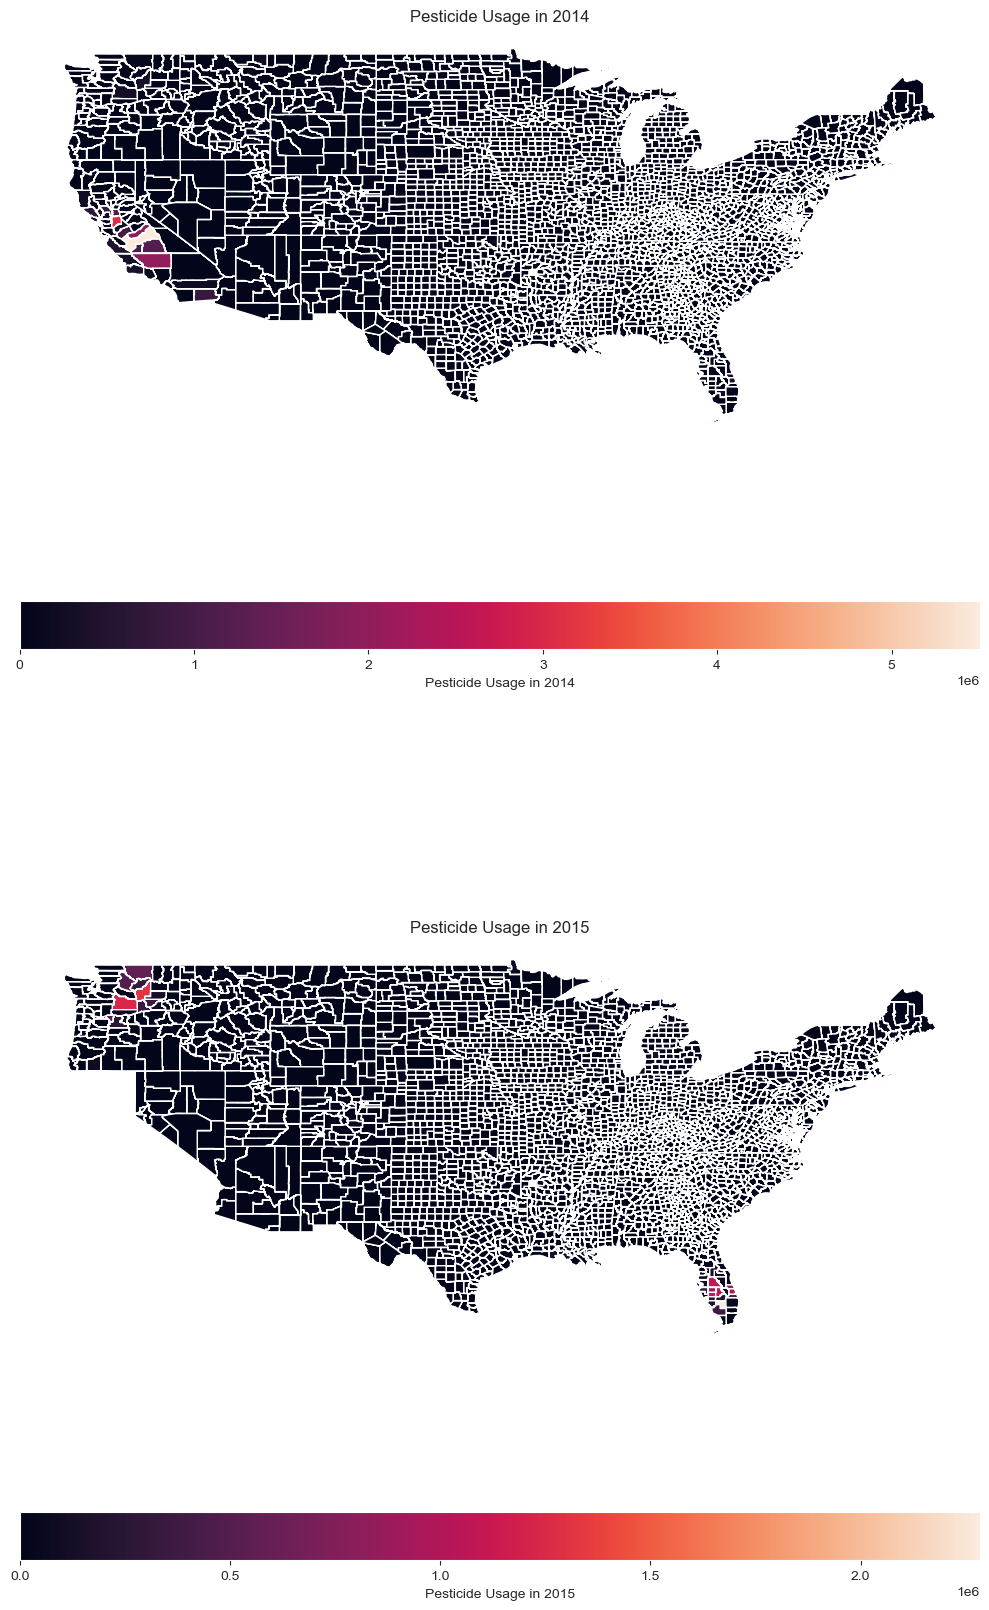

In [41]:
# Plot the data for 2014 and 2015
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 20))

# 2014 Pesticide Usage
data2014_gpd_merge.plot(column='HIGH_ESTIMATE',
                        ax=ax[0],
                        legend=True,
                        # cmap='Reds',  # Set color to red
                        legend_kwds={'label': "Pesticide Usage in 2014", 'orientation': "horizontal"})
ax[0].set_title('Pesticide Usage in 2014')
ax[0].axis('off')

# 2015 Pesticide Usage
data2015_gpd_merge.plot(column='HIGH_ESTIMATE',
                        ax=ax[1],
                        legend=True,
                        # cmap='Reds',  # Set color to red
                        legend_kwds={'label': "Pesticide Usage in 2015", 'orientation': "horizontal"})
ax[1].set_title('Pesticide Usage in 2015')
ax[1].axis('off')

plt.tight_layout()
plt.savefig("./outputs/Pesticide Usage in 2014-2015(filled map).png")
plt.show()

### Analysis

Based on these two geographic distribution maps, we can analyze the pesticide usage across various regions in the United States for 2014 and 2015. These maps display a gradient from lower usage (dark purple) to higher usage (bright orange), helping us identify geographic patterns of pesticide use and their annual changes.

Geographic Distribution of Pesticide Use in 2014
- On the 2014 map, high-value areas of pesticide use are mainly concentrated in specific regions of the Midwest and West. For example, central and southern California show higher levels of pesticide use, likely related to extensive agricultural activities in the state.
- Certain states in the Midwest, such as Iowa and Nebraska, also exhibit significant pesticide use, which is associated with large-scale corn and soybean cultivation in these areas.

Geographic Distribution of Pesticide Use in 2015
- The 2015 map shows a reduction in pesticide use in some regions, particularly in the Midwest. This could be due to changes in agricultural practices, more effective pest management strategies or greater environmental awareness.
- However, certain areas like California still have high levels of pesticide use, continuing to highlight its significance regarding pesticide application.

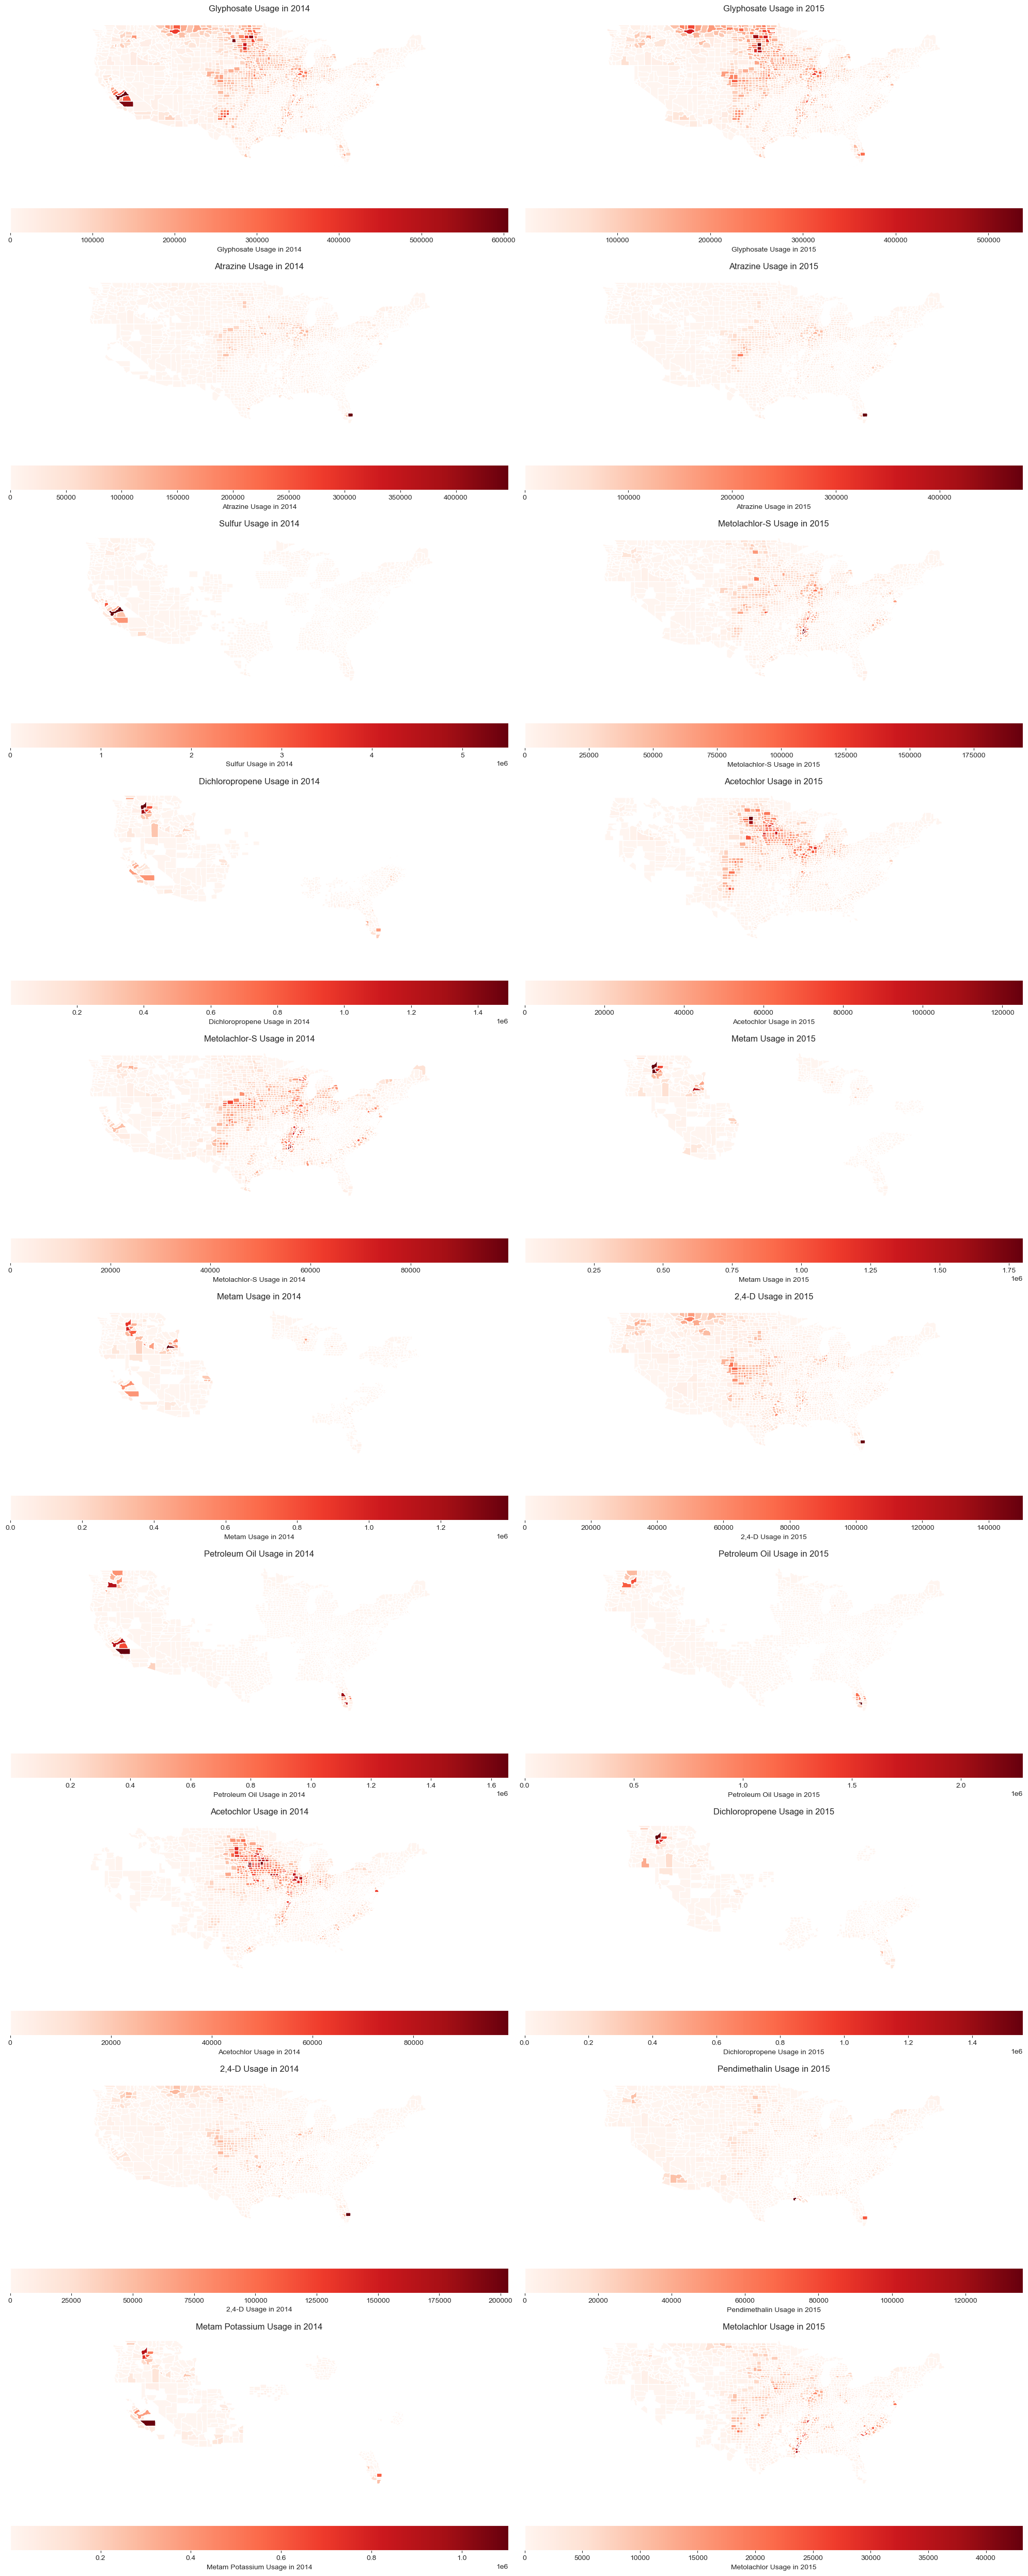

In [25]:
# Function to process data and merge with geodataframe
def process_data(pesticide_data, us_geodf, year):
    # Calculate total usage and select top 10 pesticides
    top_pesticides = pesticide_data.groupby('COMPOUND')['HIGH_ESTIMATE'].sum().nlargest(10).index
    # Filter data for top 10 pesticides
    top_pesticide_data = pesticide_data[pesticide_data['COMPOUND'].isin(top_pesticides)]
    # Merge with geodataframe
    top_pesticide_gdf = gpd.GeoDataFrame(top_pesticide_data)
    top_pesticide_gdf_merge = gpd.GeoDataFrame.merge(us_geodf, top_pesticide_gdf, on=['COUNTY_CODE', 'STATE_CODE'], how='left')
    return top_pesticide_gdf_merge, top_pesticides

# Process data for 2014 and 2015
data2014_gpd_merge, top_pesticides_2014 = process_data(state_2014_df, us_geodf, 2014)
data2015_gpd_merge, top_pesticides_2015 = process_data(state_2015_df, us_geodf, 2015)

# Plot the data for top 10 pesticides in 2014 and 2015
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(20, 50))

# Flatten the axes array
ax = ax.flatten()

# Plot each pesticide for 2014
for i, compound in enumerate(top_pesticides_2014):
    pesticide_df_2014 = data2014_gpd_merge[data2014_gpd_merge['COMPOUND'] == compound]
    pesticide_df_2014.plot(column='HIGH_ESTIMATE',
                           ax=ax[i*2],
                           legend=True,
                           cmap='Reds',
                           legend_kwds={'label': f"{compound} Usage in 2014", 'orientation': "horizontal"})
    ax[i*2].set_title(f'{compound} Usage in 2014')
    ax[i*2].axis('off')

# Plot each pesticide for 2015
for i, compound in enumerate(top_pesticides_2015):
    pesticide_df_2015 = data2015_gpd_merge[data2015_gpd_merge['COMPOUND'] == compound]
    pesticide_df_2015.plot(column='HIGH_ESTIMATE',
                           ax=ax[i*2+1],
                           legend=True,
                           cmap='Reds',
                           legend_kwds={'label': f"{compound} Usage in 2015", 'orientation': "horizontal"})
    ax[i*2+1].set_title(f'{compound} Usage in 2015')
    ax[i*2+1].axis('off')

plt.tight_layout()
plt.show()

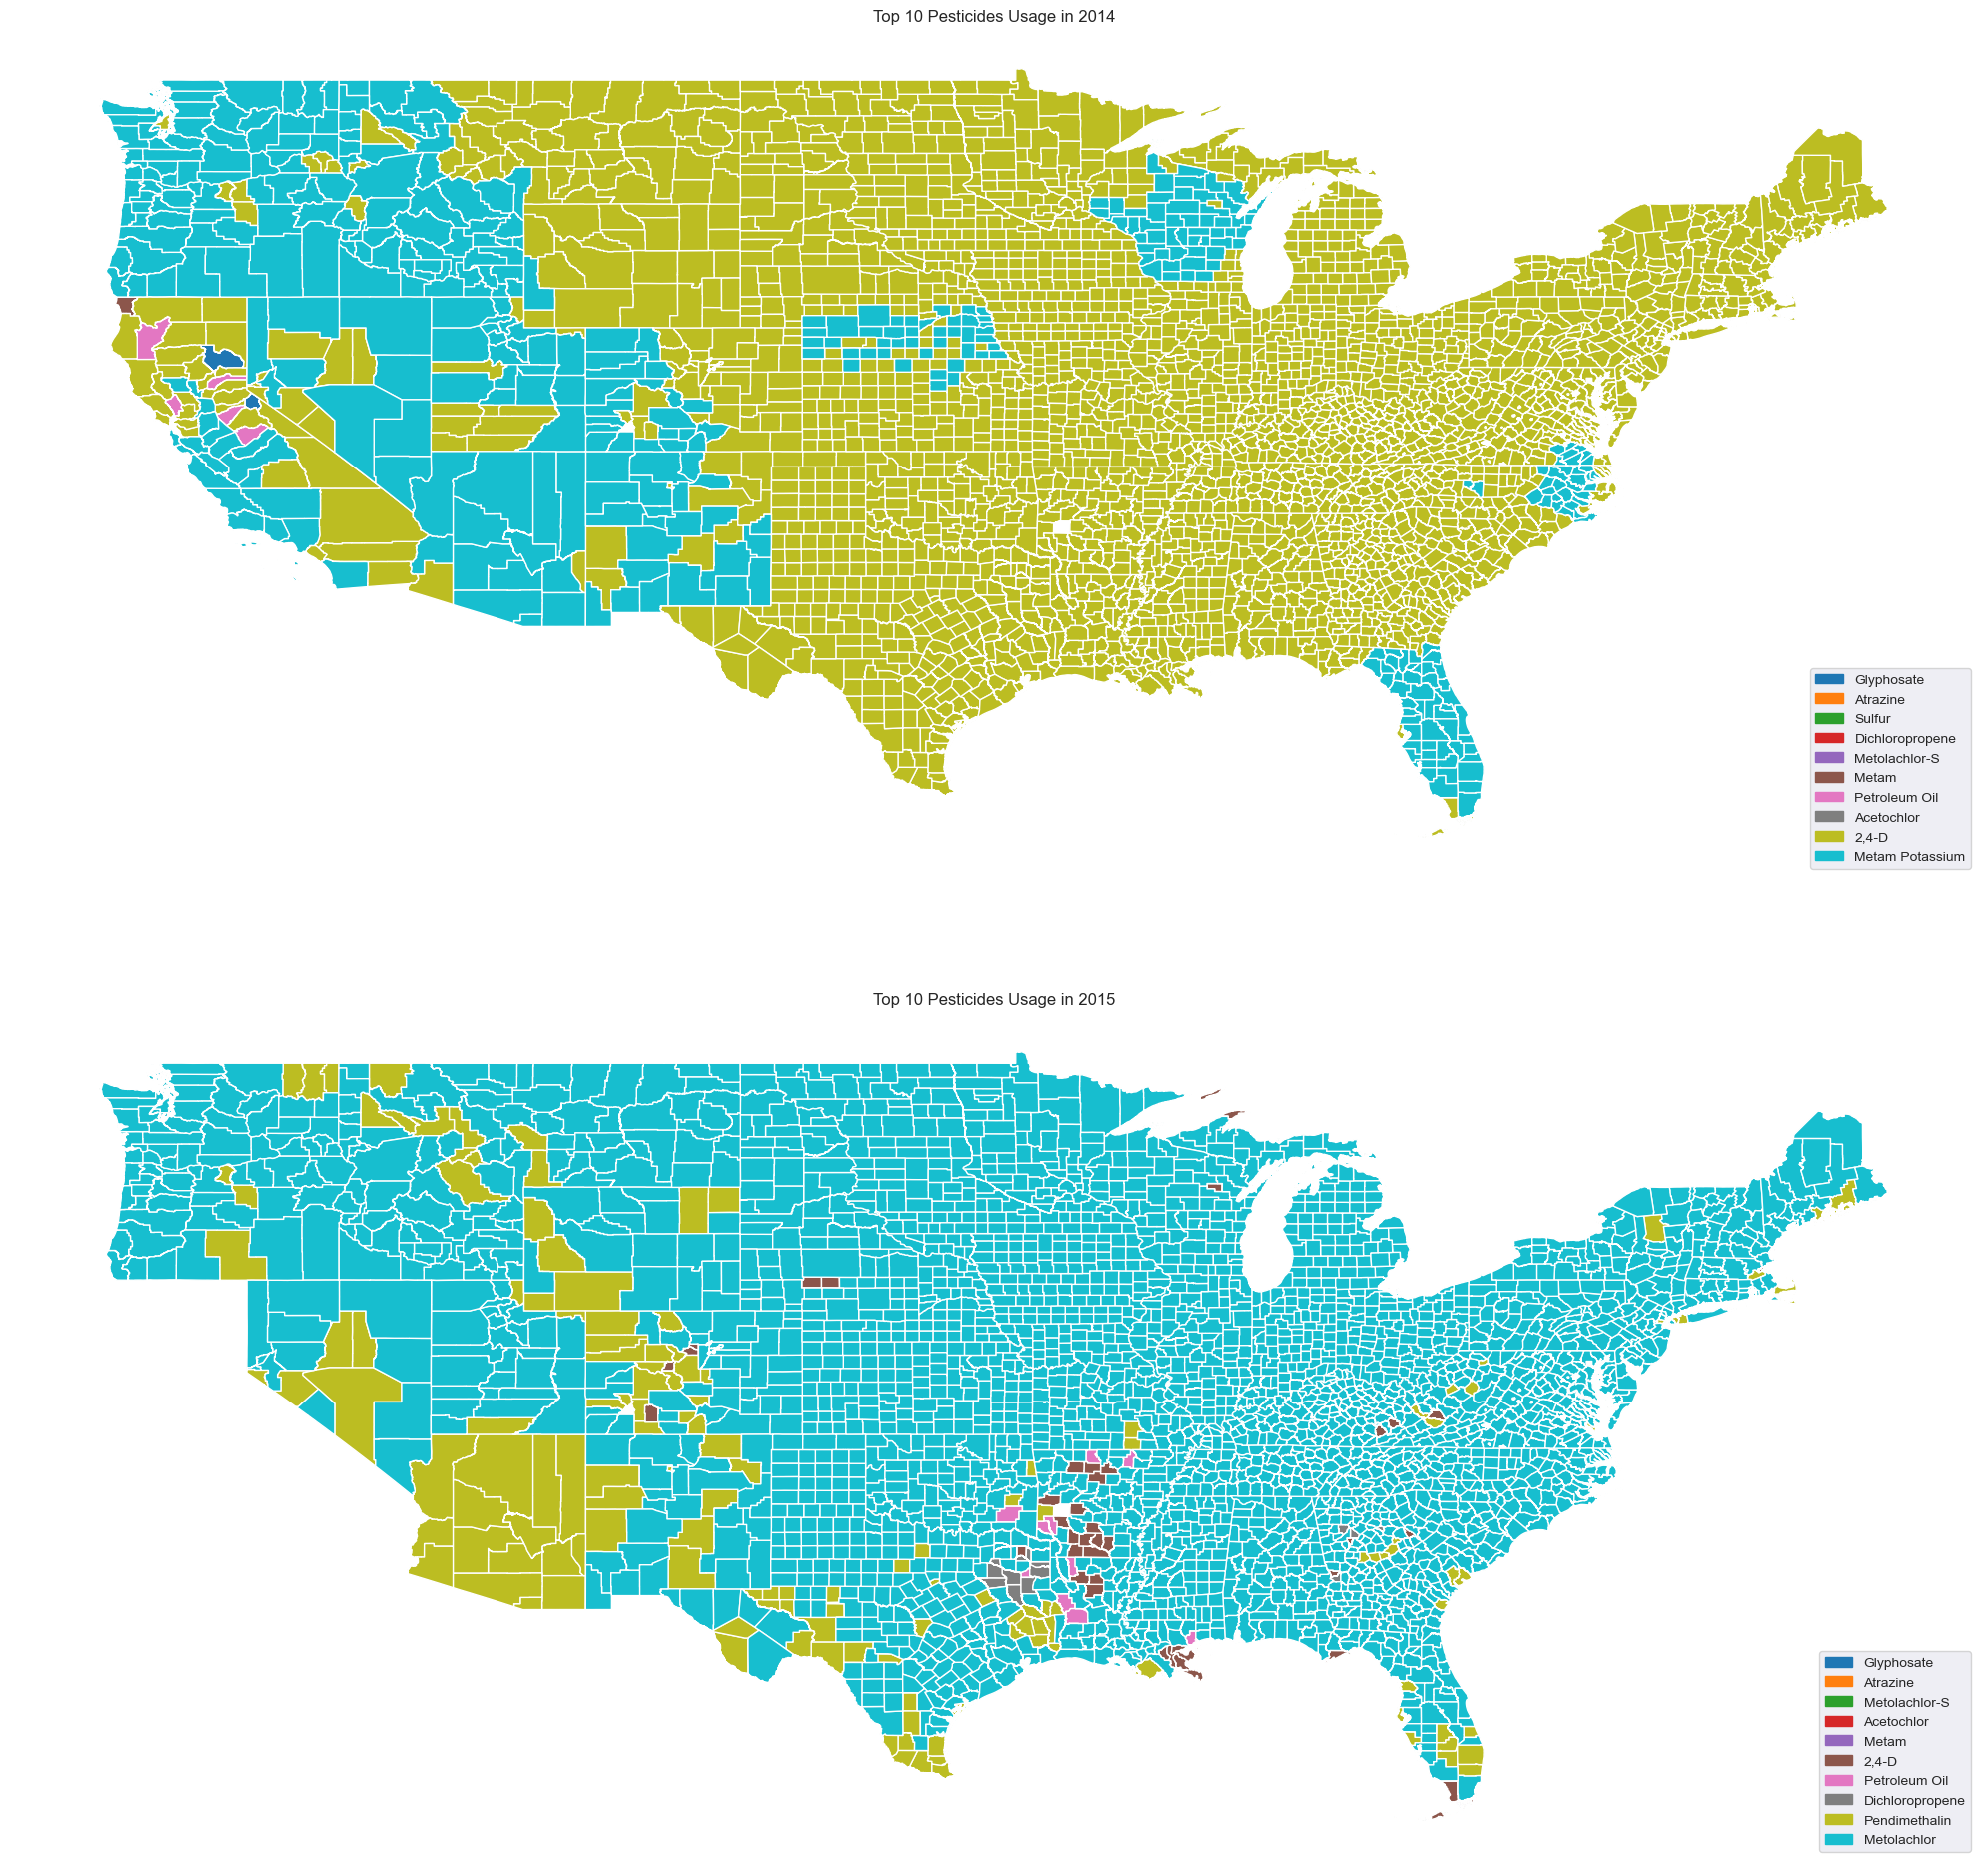

In [42]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Function to process data and merge with geodataframe
def process_data(pesticide_data, us_geodf, year):
    # Calculate total usage and select top 10 pesticides
    top_pesticides = pesticide_data.groupby('COMPOUND')['HIGH_ESTIMATE'].sum().nlargest(10).index
    # Filter data for top 10 pesticides
    top_pesticide_data = pesticide_data[pesticide_data['COMPOUND'].isin(top_pesticides)]
    # Merge with geodataframe
    top_pesticide_gdf = gpd.GeoDataFrame(top_pesticide_data)
    top_pesticide_gdf_merge = gpd.GeoDataFrame.merge(us_geodf, top_pesticide_gdf, on=['COUNTY_CODE', 'STATE_CODE'], how='left')
    return top_pesticide_gdf_merge, top_pesticides

# Process data for 2014 and 2015
data2014_gpd_merge, top_pesticides_2014 = process_data(state_2014_df, us_geodf, 2014)
data2015_gpd_merge, top_pesticides_2015 = process_data(state_2015_df, us_geodf, 2015)

# Define colors for the top 10 pesticides
colors = list(mcolors.TABLEAU_COLORS.keys())

# Plot the data for top 10 pesticides in 2014
fig, ax = plt.subplots(2, 1, figsize=(20, 20))

for i, compound in enumerate(top_pesticides_2014):
    pesticide_df_2014 = data2014_gpd_merge[data2014_gpd_merge['COMPOUND'] == compound]
    pesticide_df_2014.plot(column='HIGH_ESTIMATE',
                           ax=ax[0],
                           legend=True,
                           color=colors[i],
                           legend_kwds={'label': f"{compound} Usage in 2014", 'orientation': "horizontal"})
ax[0].set_title('Top 10 Pesticides Usage in 2014')
ax[0].axis('off')

# Create legend for 2014
patches_2014 = [mpatches.Patch(color=colors[i], label=compound) for i, compound in enumerate(top_pesticides_2014)]
ax[0].legend(handles=patches_2014, loc='lower right')

# Plot the data for top 10 pesticides in 2015
for i, compound in enumerate(top_pesticides_2015):
    pesticide_df_2015 = data2015_gpd_merge[data2015_gpd_merge['COMPOUND'] == compound]
    pesticide_df_2015.plot(column='HIGH_ESTIMATE',
                           ax=ax[1],
                           legend=True,
                           color=colors[i],
                           legend_kwds={'label': f"{compound} Usage in 2015", 'orientation': "horizontal"})
ax[1].set_title('Top 10 Pesticides Usage in 2015')
ax[1].axis('off')

# Create legend for 2015
patches_2015 = [mpatches.Patch(color=colors[i], label=compound) for i, compound in enumerate(top_pesticides_2015)]
ax[1].legend(handles=patches_2015, loc='lower right')

plt.tight_layout()
plt.savefig("./outputs/Top 10 Pesticides Usage 2014-2015(filled map)")
plt.show()

### Analysis

These two maps show the usage of the top ten pesticides in different regions of the United States in 2014 and 2015. Different colors are used on the maps to indicate the intensity of use for each pesticide, with each pesticide corresponding to a specific color, helping us identify their geographical distribution and annual changes.

Analysis of geographical distribution for various pesticides:

2014:
• Glyphosate was widely used across the United States, especially in the Midwest, likely due to large-scale corn and soybean cultivation in that region.
• Atrazine and Metolachlor were also widely used in the Midwest, indicating a demand for specific crop protectants in these areas.
• Sulfur and Petroleum Oil were more commonly used in California and other orchard-dense regions, related to pest management needs for fruit trees.

2015:
• In 2015's map, Glyphosate remained widely used but appeared to decrease in certain areas such as California and parts of the Southeast.
• New colors indicated an increase in usage of other pesticides like 2,4-D and Dicamba, possibly due to rising demands for combating resistant weeds.
• Dichloropropene saw increased use in some southern regions, potentially linked to soil fumigation needs.

Annual change comparison:
• From 2014 to 2015, there were shifts in geographic distribution for some pesticides. Notably, Glyphosate usage decreased in certain areas while usage of chemicals like 2,4-D and Dicamba increased. This may reflect adjustments in pest and weed management strategies within agricultural production.
• Overall changes might be influenced by alterations in agricultural policies, market demands, cropping patterns changes as well as environmental regulations.

## Conclusion：

These maps provide strong visual evidence for analyzing pesticide use trends in American agriculture, revealing the differences in pesticide usage across different regions and their changes over time. This information is crucial for environmental scientists, agricultural experts, and policymakers to better understand and manage pesticide use, ensuring the sustainability of agricultural production and environmental safety. Additionally, continuous monitoring and analysis of this data help guide future agricultural practices and policy-making to address potential environmental and health challenges.
